# Εισάγουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

## Εισάγουμε τα δεδομένα και κρατάμε τις στήλες που χρειαζόμαστε

In [ ]:
skai_df = pd.read_csv("https://raw.githubusercontent.com/stavrouk/Stavrou_Teliki_Ergasia/main/Scraping/skai_emvolio.csv")

In [ ]:
skai_df= skai_df[['title' , 'date' , 'summary' , 'body']]

In [ ]:
skai_df.head()

,title,date,summary,body
0,Moderna: Τουλάχιστον έξι μήνες προστασία μετά ...,14/04/2021 - 01:09,Το εμβόλιο της Moderna έχει λάβει άδεια ή έχει...,\nΗ αμερικανική φαρμακευτική εταιρία Moderna α...
1,Η Pfizer θα παράγει συστατικό για το εμβόλιο κ...,19/05/2021 - 16:04,Ο Ιρλανδός πρωθυπουργός Μίχολ Μάρτιν χαιρέτισε...,\nΗ Pfizer πρόκειται να ξεκινήσει να παράγει β...
2,Ο Άντονι Φάουτσι στον ΣΚΑΪ: Τι είπε για τα εμβ...,05/03/2021 - 20:10,"Ο Eπιδημιολόγος-σύμβουλος προέδρου Μπάιντεν, α...",\nΟ κορυφαίος επιστημονας και επικεφαλής λοιμω...
3,Γώγος σε ΣΚΑΪ: Αυστηρότερα μέτρα αν χρειαστεί ...,01/02/2021 - 09:34,"Όπως ανέφερε το μέλος της επιτροπής, υπάρχουν ...",\n«Το πιο πιθανό είναι να συνεχίσουμε όπως είμ...
4,Βασιλακόπουλος στον ΣΚΑΪ: «Όχι» σε πρόωρο άνοι...,31/12/2020 - 09:46,«Τα δύσκολα είναι μπροστά μας… Τέλη Ιανουαρίου...,\nΚατά του πρόωρου ανοίγματος των σχολείων τάχ...


In [ ]:
len(skai_df)

1795

In [ ]:
star_df = pd.read_csv("https://raw.githubusercontent.com/stavrouk/Stavrou_Teliki_Ergasia/main/Scraping/star_emvolio.csv")

In [ ]:
star_df= star_df[['title' , 'date' , 'summary' , 'body']]

In [ ]:
star_df.head()

,title,date,summary,body
0,Θεοδωρίδου: Έρχεται Το Εμβόλιο Της Johnson & J...,"01.03.21, 19:02",«Σύντομα θα έχουμε το εμβόλιο της Johnson & Jo...,\nΣτη σημασία των εμβολιασμών κατά του κορωνοϊ...
1,AstraZeneca: Αποτελεσματικό Κατά Σχεδόν 100% Τ...,"19.02.21, 10:53",Αποτρέπει μια σοβαρή εξέλιξη της νόσου,\n«Το εμβόλιο της AstraZeneca κατά του κορωνοϊ...
2,Μαρία Ναυπλιώτου: Θα Κάνει Ή Όχι Το Εμβόλιο Το...,"24.01.21, 15:00",Η ηθοποιός ήταν καλεσμένη στο TRACTION με τον ...,"\nΣτο σημερινό επεισόδιο του TRACTION, ο Κώστα..."
3,Παπαδάκης: Θα Κάνω Το Εμβόλιο | Star.gr,"04.01.21, 16:09",Τι είπε στην εκπομπή της Φαίης Σκορδά,\nΓια την κατάσταση που επικρατεί λόγω της παν...
4,Βερολίνο: Κοντά Σε Συμφωνία με τη Ρωσία Για το...,"19.03.21, 19:38","Όσα δήλωσε ο Υπουργός Υγείας της Γερμανίας, Γε...",\nΞεκίνησε η αξιολόγηση του Sputnik V από τις ...


In [ ]:
len(star_df)

509

## Αλλάζουμε το date σε datetime και δημιουργούμε 3 νέες στήλες (ημέρα, μήνας, έτος)

In [ ]:
skai_df['date'] = pd.to_datetime(skai_df['date'], format='%d/%m/%Y - %H:%M')
skai_df['date']

0      2021-04-14 01:09:00
1      2021-05-19 16:04:00
2      2021-03-05 20:10:00
3      2021-02-01 09:34:00
4      2020-12-31 09:46:00
               ...        
1790   2021-01-07 18:38:00
1791   2021-02-18 13:14:00
1792   2021-03-16 10:03:00
1793   2021-03-24 17:53:00
1794   2021-03-12 17:42:00
Name: date, Length: 1795, dtype: datetime64[ns]

In [ ]:
#Αλλάζουμε το format του έτους στο date για να μπορεί να αναγνωστεί ως %Y και να μετατραπεί σε datetime
star_df['date'] = star_df['date'].str.replace("20,", "2020,")
star_df['date'] = star_df['date'].str.replace("21,", "2021,")

In [ ]:
star_df['date'] = pd.to_datetime(star_df['date'], format='%d.%m.%Y, %H:%M')
star_df['date']

0     2021-03-01 19:02:00
1     2021-02-19 10:53:00
2     2021-01-24 15:00:00
3     2021-01-04 16:09:00
4     2021-03-19 19:38:00
              ...        
504   2021-01-04 12:00:00
505   2021-06-16 10:13:00
506   2021-06-04 11:32:00
507   2021-05-31 19:51:00
508   2021-03-04 13:37:00
Name: date, Length: 509, dtype: datetime64[ns]

In [ ]:
skai_df['year'] = pd.DatetimeIndex(skai_df['date']).year
skai_df['month'] = pd.DatetimeIndex(skai_df['date']).month
skai_df['day'] = pd.DatetimeIndex(skai_df['date']).day

In [ ]:
star_df['year'] = pd.DatetimeIndex(star_df['date']).year
star_df['month'] = pd.DatetimeIndex(star_df['date']).month
star_df['day'] = pd.DatetimeIndex(star_df['date']).day

## Καθαρίζουμε τα άρθρα από περιττά στοιχεία και διαλέγουμε τα άρθρα που δημοσιεύτηκαν το 2021

In [ ]:
skai_df['body'] = skai_df['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
star_df['body'] = star_df['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
star_df['body'] = star_df['body'].str.replace('googletag',' ').str.replace('ad',' ').str.replace('gpt',' ').str.replace('function',' ').str.replace('div',' ').str.replace('display',' ').str.replace('cmd',' ').str.replace('push',' ').str.replace('1618837763216',' ')

In [ ]:
star_df['body'] = star_df['body'].str.replace('\n'," ")
star_df['body'] = star_df['body'].str.replace('\xa0'," ")
skai_df['body'] = skai_df['body'].str.replace('\n'," ")

In [ ]:
star_df = star_df[star_df['year'] == 2021]

In [ ]:
skai_df = skai_df[skai_df['year'] == 2021]

In [ ]:
skai_df.head()

,title,date,summary,body,year,month,day
0,Moderna: Τουλάχιστον έξι μήνες προστασία μετά ...,2021-04-14 01:09:00,Το εμβόλιο της Moderna έχει λάβει άδεια ή έχει...,Η αμερικανική φαρμακευτική εταιρία Moderna αν...,2021,4,14
1,Η Pfizer θα παράγει συστατικό για το εμβόλιο κ...,2021-05-19 16:04:00,Ο Ιρλανδός πρωθυπουργός Μίχολ Μάρτιν χαιρέτισε...,Η Pfizer πρόκειται να ξεκινήσει να παράγει βα...,2021,5,19
2,Ο Άντονι Φάουτσι στον ΣΚΑΪ: Τι είπε για τα εμβ...,2021-03-05 20:10:00,"Ο Eπιδημιολόγος-σύμβουλος προέδρου Μπάιντεν, α...",Ο κορυφαίος επιστημονας και επικεφαλής λοιμωξ...,2021,3,5
3,Γώγος σε ΣΚΑΪ: Αυστηρότερα μέτρα αν χρειαστεί ...,2021-02-01 09:34:00,"Όπως ανέφερε το μέλος της επιτροπής, υπάρχουν ...",«Το πιο πιθανό είναι να συνεχίσουμε όπως είμα...,2021,2,1
5,ΗΑΕ-κορωνοϊός: Υποχρεωτικός ο εμβολιασμός για ...,2021-05-26 09:47:00,Η πολιτική αυτή αφορά όλες τις αθλητικές και π...,Τα Ηνωμένα Αραβικά Εμιράτα ανακοίνωσαν ότι ο ...,2021,5,26


In [ ]:
len(skai_df)

1659

In [ ]:
star_df.head()

,title,date,summary,body,year,month,day
0,Θεοδωρίδου: Έρχεται Το Εμβόλιο Της Johnson & J...,2021-03-01 19:02:00,«Σύντομα θα έχουμε το εμβόλιο της Johnson & Jo...,Στη σημασία των εμβολιασμών κατά του κορωνοϊο...,2021,3,1
1,AstraZeneca: Αποτελεσματικό Κατά Σχεδόν 100% Τ...,2021-02-19 10:53:00,Αποτρέπει μια σοβαρή εξέλιξη της νόσου,«Το εμβόλιο της AstraZeneca κατά του κορωνοϊο...,2021,2,19
2,Μαρία Ναυπλιώτου: Θα Κάνει Ή Όχι Το Εμβόλιο Το...,2021-01-24 15:00:00,Η ηθοποιός ήταν καλεσμένη στο TRACTION με τον ...,"Στο σημερινό επεισόδιο του TRACTION, ο Κώστας...",2021,1,24
3,Παπαδάκης: Θα Κάνω Το Εμβόλιο | Star.gr,2021-01-04 16:09:00,Τι είπε στην εκπομπή της Φαίης Σκορδά,Για την κατάσταση που επικρατεί λόγω της πανδ...,2021,1,4
4,Βερολίνο: Κοντά Σε Συμφωνία με τη Ρωσία Για το...,2021-03-19 19:38:00,"Όσα δήλωσε ο Υπουργός Υγείας της Γερμανίας, Γε...",Ξεκίνησε η αξιολόγηση του Sputnik V από τις Β...,2021,3,19


In [ ]:
len(star_df)

469

# Ορίζουμε την ημερομηνία ως index και δημιουργούμε τα πρώτα γραφήματα

In [ ]:
skai_df.set_index('date' , inplace=True)
star_df.set_index('date' , inplace=True)

In [ ]:
#Κάνουμε sort για να φαίνονται τα άρθρα ανάλογα με την ημερομηνία δημοσίευσης 
skai_df = skai_df.sort_index()
star_df = star_df.sort_index()

In [ ]:
#Ο αριθμός των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['2021-01': ].value_counts('month')

month
1    383
2    312
3    306
5    250
4    240
6    168
dtype: int64

In [ ]:
#Ο αριθμός των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['2021-01': ].value_counts('month')

month
5    109
4     97
1     82
3     66
6     64
2     51
dtype: int64

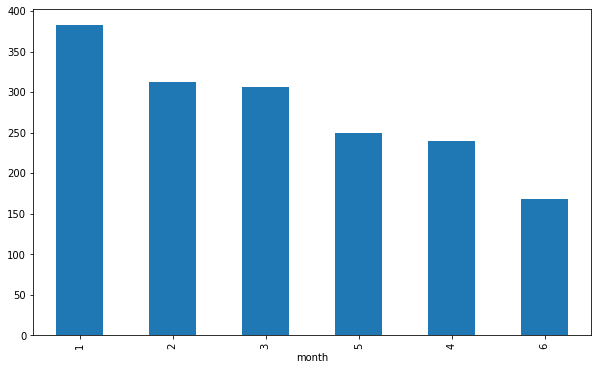

In [ ]:
#Γράφημα με τον αριθμό των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['2021-01': ].value_counts('month').plot(kind= 'bar', figsize= (10,6))

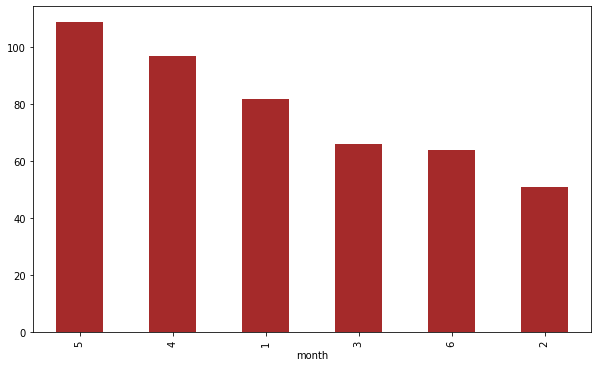

In [ ]:
#Γράφημα με τον αριθμό των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['2021-01': ].value_counts('month').plot(kind= 'bar', figsize= (10,6), color= 'brown')

In [ ]:
#Ο μέσος όρος των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['month'].value_counts().sort_values(ascending= False).mean()

276.5

In [ ]:
#Ο μέσος όρος των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['month'].value_counts().sort_values(ascending= False).mean()

78.16666666666667

## Φτιάχνουμε το WordCloud από τα κείμενα των τίτλων και των περιγραφών

In [ ]:
#Δημιουργούμε νέα στήλη με το κείμενο του τίτλου και της περιγραφής, των άρθρων
skai_df["text"] = skai_df["title"] + skai_df["summary"]

In [ ]:
#Δημιουργούμε νέα στήλη με το κείμενο του τίτλου και της περιγραφής, των άρθρων
star_df["text"] = star_df["title"] + star_df["summary"]

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Καθαρίζουμε το κείμενο από περιττούς χαρακτήρες
skaitext = skai_df['text'].replace("amp", ' ').str.replace('AMP',' ').str.replace('Amp',' ').str.replace('links',' ').str.replace("RT", " ").str.replace('@',' ').str.replace('http',' ').str.replace('https',' ').str.replace('rt',' ').str.cat(sep = ' ')

In [ ]:
#Καθαρίζουμε το κείμενο από περιττούς χαρακτήρες
startext = star_df['text'].replace("amp", ' ').str.replace('AMP',' ').str.replace('Amp',' ').str.replace('links',' ').str.replace("RT", " ").str.replace('@',' ').str.replace('http',' ').str.replace('https',' ').str.replace('rt',' ').str.cat(sep = ' ')

In [ ]:
skaitext

'Ο πλανήτης υποδέχτηκε το νέο έτος με περιορισμούς αλλά και ελπίδα | ΣΚΑΪΟ πλανήτης άρχισε να γυρίζει την σελίδα του έτους 2020 που σημαδεύτηκε από την πανδημία του κορονοϊού αναγκάζοντας δισεκατομμύρια ανθρώπους να γιορτάζουν ιδιωτικά στο σπίτι τους την αλλαγή του χρόνου. Μέρκελ: Θα κάνω το εμβόλιο όταν έρθει η σειρά μου | ΣΚΑΪΗ Μέρκελ προειδοποίησε πως «αυτές οι μέρες και εβδομάδες –δεν υπάρχει κάτι να εξωραΐσουμε– είναι δύσκολοι καιροί για τη χώρα μας. Βρετανικός Τύπος: Μεταξύ θριάμβου και ανησυχίας για νέα εποχή για χώρα εκτός ΕΕ | ΣΚΑΪTo Ηνωμένο Βασίλειο ξαναπαίρνει στα χέρια του “την τύχη του”, όμως η αποχώρησή του από την ΕΕ έγινε “χωρίς τυμπανοκρουσίες” τέσσερα χρόνια μετά το δημοψήφισμα για το Brexit, υπογράμμιζαν σήμερα οι βρετανικές εφημερίδες. Χρονιά λύτρωσης αναμένεται το 2021 χάρη στα εμβόλια | ΣΚΑΪΑν τα εμβόλια αποδείχθηκαν πολλές φορές σωτήρια στο παρελθόν, τότε και το 2021 θα είναι μια χρονιά λύτρωσης στη μάχη που δίνει η ανθρωπότητα με την πανδημία. ΠΟΥ: Χορήγησε άδει

In [ ]:
startext

"Εμβόλιο Pfizer: Μπορεί Να Υπάρχουν Καθυστερήσεις Στη Διανομή | Star.gr Για κενά προειδοποιούν οι ειδικοί της BioNTech Μεξικό: Στη ΜΕΘ 32χρονη Γιατρός Που Έκανε Το Εμβόλιο | Star.gr Τι συμπτώματα εμφάνισε Κορωνοϊός: Διασωληνωμένος Ο Υποδιοικητής Του Θριασείου | Star.gr Πριν από μια εβδομάδα είχε κάνει το εμβόλιο Εμβόλιο - ασυμπτωματικοί: Μπορεί να προκληθεί υπεραντίδραση | Star.gr Τι είπε ο καθηγητής Φαρμακολογίας του ΑΠΘ, Δημήτρης Κούβελας Βρετανία: Ξεκίνησε Η Χορήγηση Του Εμβολίου της Οξφόρδης | Star.gr Ξεκίνησαν οι εμβολιασμοί με το δεύτερο εμβόλιο Εμβόλιο: Ξεκίνησαν Οι Εμβολιασμοί Στα Γηροκομεία | Star.gr Μια 95χρονη η πρώτη που έκανε το εμβόλιο Παπαδάκης: Θα Κάνω Το Εμβόλιο | Star.gr Τι είπε στην εκπομπή της Φαίης Σκορδά Moderna: O EMA Συνεδριάζει Για Την Έγκριση Του Εμβολίου | Star.gr Δεν αποκλείεται να πει το «ναι»\u200b\u200b\u200b\u200b\u200b\u200b\u200b εντός της ημέρας Εμβόλιο Astra Zeneca: Εμποδίζει Τη Μετάδοση Του Ιού | Star.gr Σε εξέλιξη η μεγαλύτερη επιχείρηση εμβολιασμο

In [ ]:
#Εισάγουμε την απαραίτητη βιβλιοθήκη και το ελληνικό λεξικό
import spacy

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['αλλού',
 'πολλοί',
 'ταύτη',
 'έγιναν',
 'πότε',
 'πολλές',
 'όσον',
 'πόσην',
 'μείον',
 'προς',
 'όσος',
 'οποιδήποτε',
 'όλον',
 'άξαφνα',
 'δα',
 'ακόμα',
 'όλην',
 'αυτή',
 'ετούτα',
 'όλους']

In [ ]:
full_doc1 = nlp(skaitext)

In [ ]:
full_doc2 = nlp(startext)

In [ ]:
clear_text1 = ' '.join(token.lemma_ for token in full_doc1)

In [ ]:
clear_text2 = ' '.join(token.lemma_ for token in full_doc2)

In [ ]:
#Φτιάχνουμε το Wordcloud του Skai
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text1)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Φτιάχνουμε το Wordcloud του Star
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text2)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Δημιουργούμε διαγράμματα με τις πιο συχνές λέξεις στο βασικό κείμενο των άρθρων

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20)
count_vector1 = cv.fit_transform(skai_df['body'])
results1 = pd.DataFrame(count_vector1.toarray(), columns=cv.get_feature_names()) 
results1.head()


,000,19,astrazeneca,covid,pfizer,δήλωσε,δόσεις,δόση,δύο,εμβολίου,εμβολίων,εμβολιασμού,εμβόλια,εμβόλιο,ετών,πηγή,σήμερα,σύμφωνα,υγείας,χώρες
0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,2,0,1,0,0,0,2,0,0,2,0,1,0,1,0,1,0,0,0,0
2,0,2,1,2,1,0,0,0,1,0,0,0,2,1,0,1,1,1,0,0
3,5,0,0,1,0,0,0,0,1,1,0,0,1,9,1,1,2,0,3,2
4,0,2,0,2,2,1,1,0,0,1,1,0,1,5,0,1,0,0,2,3


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20)
count_vector2 = cv.fit_transform(star_df['body'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv.get_feature_names()) 
results2.head()


,19,astrazeneca,covid,johnson,pfizer,διαβάστε,δόσεις,δόση,ειδήσεις,ελλάδα,εμβολίου,εμβολίων,εμβολιασμό,εμβόλια,εμβόλιο,ετών,κορωνοϊού,κόσμο,ραντεβού,υγείας
0,0,2,0,0,4,1,3,0,1,1,6,3,0,4,8,0,3,1,0,1
1,0,0,0,0,3,2,0,0,2,1,1,1,0,0,2,0,2,1,0,1
2,0,0,0,0,0,1,0,1,1,2,1,0,1,0,0,0,2,1,0,2
3,0,0,1,0,1,1,0,0,1,1,0,1,1,0,4,0,1,2,0,1
4,1,2,1,0,0,1,0,0,1,1,1,0,0,0,8,0,1,1,0,1


In [ ]:
results1.sum(axis =0).sort_values(ascending = False)

εμβόλιο        3458
εμβολίου       2345
covid          1996
19             1871
εμβόλια        1820
πηγή           1627
υγείας         1561
astrazeneca    1493
εμβολίων       1469
δόσεις         1291
σήμερα         1189
δόση           1149
ετών           1091
pfizer         1083
δύο            1081
000             977
χώρες           972
δήλωσε          966
σύμφωνα         961
εμβολιασμού     959
dtype: int64

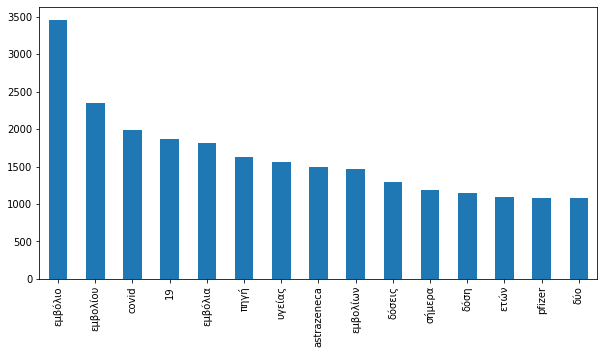

In [ ]:
results1.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize=(10,5))

In [ ]:
results2.sum(axis =0).sort_values(ascending = False)

εμβόλιο        1764
astrazeneca     974
εμβολίου        796
ελλάδα          622
ετών            600
διαβάστε        553
κόσμο           539
δόση            520
εμβόλια         493
ειδήσεις        493
pfizer          471
johnson         463
εμβολιασμό      418
ραντεβού        402
covid           372
19              368
κορωνοϊού       368
δόσεις          341
υγείας          339
εμβολίων        329
dtype: int64

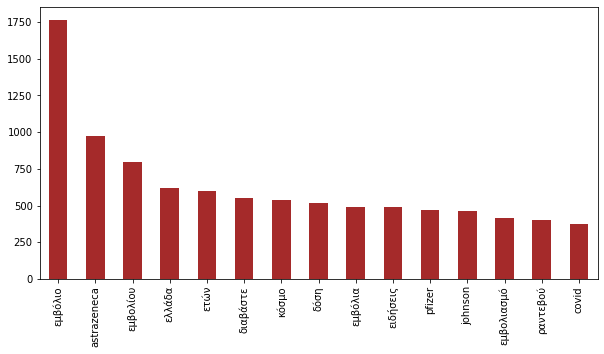

In [ ]:
results2.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize=(10,5), color= 'brown')

## Δημιουργούμε διαγράμματα με τα πιο συχνά διγράμματα στο βασικό κείμενο των άρθρων

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) )
count_vector1 = cv.fit_transform(skai_df['body'])
results1 = pd.DataFrame(count_vector1.toarray(), columns=cv.get_feature_names()) 
results1.head()

,covid 19,html5 video,johnson johnson,pfizer biontech,sars cov,skai gr,view this,απε μπε,δεύτερη δόση,δόσεις εμβολίου,δόση εμβολίου,εκατομμύρια δόσεις,εμβολίου astrazeneca,εμβόλιο astrazeneca,εμβόλιο pfizer,ηνωμένο βασίλειο,κυριάκος μητσοτάκης,πηγή skai,πηγή απε,υπουργός υγείας
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
2,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2,0,0,2,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) 
count_vector2 = cv.fit_transform(star_df['body'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv.get_feature_names()) 
results2.head()

,60 ετών,covid 19,gov gr,johnson johnson,pfizer biontech,δελτίο ειδήσεων,δεύτερη δόση,διαβάστε lifestyle,διαβάστε ειδήσεις,δόσεις εμβολίου,δόση εμβολίου,ειδήσεις ελλάδα,ειδήσεων star,ελλάδα κόσμο,εμβολίου astrazeneca,εμβόλιο astrazeneca,εμβόλιο johnson,εμβόλιο pfizer,εμβόλιο κορωνοϊού,ηλικιακή ομάδα
0,0,0,0,0,2,0,0,0,1,2,0,1,0,1,0,1,0,1,0,0
1,0,0,0,0,2,0,0,0,2,0,0,1,0,1,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
results1.sum(axis =0).sort_values(ascending = False)

covid 19                1753
απε μπε                  881
πηγή απε                 850
skai gr                  638
πηγή skai                620
εμβόλιο astrazeneca      491
pfizer biontech          419
sars cov                 378
δόση εμβολίου            370
johnson johnson          369
δεύτερη δόση             353
δόσεις εμβολίου          316
εκατομμύρια δόσεις       276
υπουργός υγείας          267
κυριάκος μητσοτάκης      264
εμβολίου astrazeneca     250
εμβόλιο pfizer           208
view this                206
ηνωμένο βασίλειο         201
html5 video              200
dtype: int64

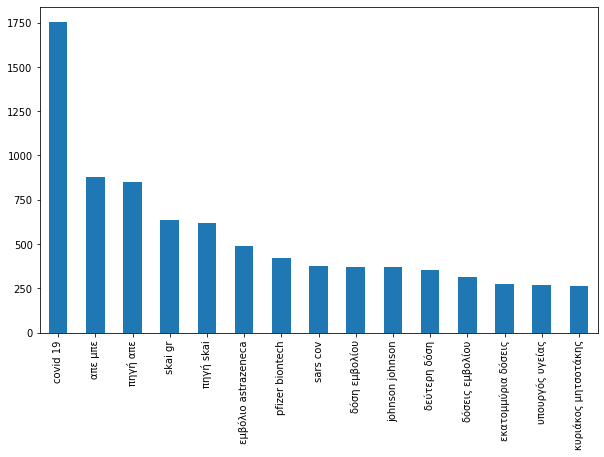

In [ ]:
results1.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize= (10,6))

In [ ]:
results2.sum(axis =0).sort_values(ascending = False)

διαβάστε ειδήσεις       473
ελλάδα κόσμο            469
ειδήσεις ελλάδα         425
εμβόλιο astrazeneca     411
covid 19                332
johnson johnson         230
δόση εμβολίου           168
δεύτερη δόση            165
ειδήσεων star           135
εμβόλιο pfizer          128
pfizer biontech         124
εμβόλιο johnson         110
δελτίο ειδήσεων         109
εμβολίου astrazeneca    101
ηλικιακή ομάδα           85
60 ετών                  85
διαβάστε lifestyle       77
δόσεις εμβολίου          75
εμβόλιο κορωνοϊού        73
gov gr                   72
dtype: int64

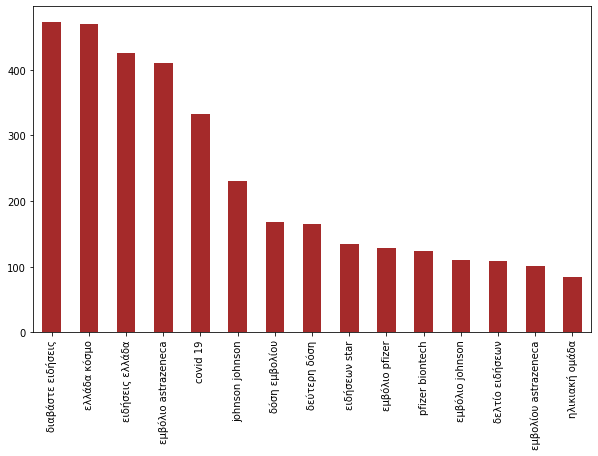

In [ ]:
results2.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize= (10,6), color= 'brown')

## Βρίσκουμε την ομοιότητα των κειμένων

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train1 = tfidf_vectorizer1.fit_transform(skai_df['body']) 

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train2 = tfidf_vectorizer2.fit_transform(star_df['body'])  

In [ ]:
results1 = pd.DataFrame(tfidf_matrix_train1.toarray(), columns=tfidf_vectorizer1.get_feature_names()) 
results1.head()

,00,000,10,100,11,12,14,15,16,17,18,19,20,200,2020,2021,21,24,25,27,30,40,50,500,55,60,65,70,80,90,and,astrazeneca,biontech,browser,cdc,consider,cov,covid,ema,enable,...,τομέα,τουρκία,τρίτο,τρόπο,τόνισε,τύπου,υγεία,υγείας,υπάρξει,υπάρχει,υπάρχουν,υπηρεσία,υπογράμμισε,υπουργείο,υπουργείου,υπουργός,φάση,φαίνεται,φαρμάκων,φεβρουαρίου,φορά,φορές,χαρακτηριστικά,χθες,χορήγηση,χορηγείται,χορηγηθεί,χρήση,χρήσης,χρειάζεται,χρειαστεί,χρόνια,χρόνο,χωρών,χώρα,χώρας,χώρες,χώρους,ψηφιακό,ώρα
0,0.482067,0.060411,0.0,0.0,0.0,0.077286,0.0,0.080478,0.0,0.0,0.0,0.043354,0.000000,0.0,0.094864,0.234230,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.042575,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.046726,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.085908,0.000000,0.054528,0.0,0.000000,0.099632,0.0,0.252778
1,0.000000,0.191188,0.0,0.0,0.0,0.000000,0.0,0.127348,0.0,0.0,0.0,0.000000,0.000000,0.0,0.150113,0.123549,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.081484,0.103399,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.148756,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.094053,0.0,0.161562,0.0,0.0,0.0,0.0,0.0,0.0,0.101974,0.0,0.000000,0.000000,0.0,0.115492,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.149769,0.000000,0.000000,0.086285,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.095469,0.000000,0.0,0.000000,0.171929,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.112099,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.056696,0.071945,0.0,0.0,0.0,0.0,0.093754,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.205179,0.0,0.07787,0.000000,0.000000,0.0,0.104209,0.000000,0.000000,0.120074,0.0,0.000000,0.000000,0.0,0.092772
3,0.000000,0.324083,0.0,0.0,0.0,0.000000,0.0,0.086347,0.0,0.0,0.0,0.000000,0.089635,0.0,0.000000,0.083771,0.0,0.0,0.0,0.0,0.086618,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.105263,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.045681,0.0,0.0,...,0.000000,0.0,0.0,0.093188,0.000000,0.0,0.0,0.150400,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.382833,0.111459,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.203099,0.184348,0.000000,0.000000,0.0,0.128886,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.112369,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.115149,0.000000,0.0,0.000000,0.169361,0.0,0.0,0.0,0.0,0.110350,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.078976,0.0,0.0,0.121106,0.0,0.000000,0.0,0.264627,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.115601,0.000000,0.0,0.000000,0.0,0.120750,0.0,0.00000,0.126196,0.116523,0.0,0.000000,0.000000,0.122937,0.000000,0.0,0.233512,0.000000,0.0,0.000000


In [ ]:
results2 = pd.DataFrame(tfidf_matrix_train2.toarray(), columns=tfidf_vectorizer2.get_feature_names()) 
results2.head()

,000,10,100,11,12,14,15,16,1618837894283,17,18,19,1η,20,2021,21,24,25,27,28,29,2η,30,39,40,44,45,50,55,60,64,65,70,75,80,85,95,ap,astrazeneca,biontech,...,τόνισε,τύπου,υγείας,υπάρξει,υπάρχει,υπάρχουν,υπενθυμίζεται,υπερτερούν,υπηρεσία,υπουργείο,υπουργείου,υπουργός,φάρμακα,φάση,φαίνεται,φαρμάκων,φαρμακευτική,φεβρουαρίου,φορά,φορές,φροντίδας,φως,φωτογραφία,χαρακτηριστικά,χθες,χορήγηση,χορηγείται,χορηγηθεί,χρήση,χρήσης,χρειαστεί,χρονικό,χρόνια,χρόνο,χώρα,χώρας,χώρες,όρους,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.064504,0.0,0.000000,0.0,0.085646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075629,0.0,0.0,0.0,0.0,0.0,0.075032,0.400054,...,0.060120,0.0,0.039498,0.0,0.056920,0.062058,0.0,0.0,0.0,0.000000,0.000000,0.074077,0.00000,0.0,0.148153,0.052949,0.084016,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.059597,0.0,0.085646,0.0,0.0,0.0,0.048623,0.0,0.060120,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.174806,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.246432,...,0.000000,0.0,0.085158,0.0,0.000000,0.133796,0.0,0.0,0.0,0.349613,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.127935,0.133176,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.104831,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.167927,0.0,0.120998,0.131919,0.0,0.0,0.0,0.000000,0.156417,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152725,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.222593,0.0,0.073121,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.15855,0.0,0.137133,0.000000,0.000000,0.0,0.0,0.15855,0.148845,0.0,0.0,0.40597,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.090013,0.0,0.111296,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090341,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.153718,0.000000,...,0.000000,0.0,0.080921,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train1, tfidf_matrix_train1))

cosine scores ==>  [[1.         0.14151248 0.11888362 ... 0.11770786 0.07270471 0.01784754]
 [0.14151248 1.         0.1043473  ... 0.14719201 0.07521117 0.02802382]
 [0.11888362 0.1043473  1.         ... 0.17325706 0.05864835 0.03708303]
 ...
 [0.11770786 0.14719201 0.17325706 ... 1.         0.06809559 0.04229143]
 [0.07270471 0.07521117 0.05864835 ... 0.06809559 1.         0.02599269]
 [0.01784754 0.02802382 0.03708303 ... 0.04229143 0.02599269 1.        ]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train2, tfidf_matrix_train2))

cosine scores ==>  [[1.         0.34363245 0.1594616  ... 0.36736334 0.08182662 0.1599323 ]
 [0.34363245 1.         0.23569102 ... 0.2895042  0.07840581 0.13819954]
 [0.1594616  0.23569102 1.         ... 0.07164492 0.11973718 0.0652382 ]
 ...
 [0.36736334 0.2895042  0.07164492 ... 1.         0.07830831 0.25941461]
 [0.08182662 0.07840581 0.11973718 ... 0.07830831 1.         0.05450084]
 [0.1599323  0.13819954 0.0652382  ... 0.25941461 0.05450084 1.        ]]


In [ ]:
arr1 = cosine_similarity(tfidf_matrix_train1, tfidf_matrix_train1)

In [ ]:
arr2 = cosine_similarity(tfidf_matrix_train2, tfidf_matrix_train2)

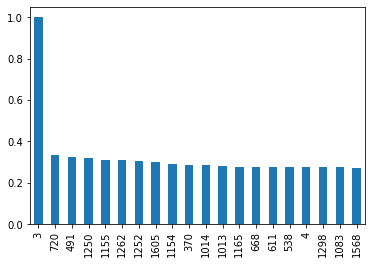

In [ ]:
pd.DataFrame(arr1).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

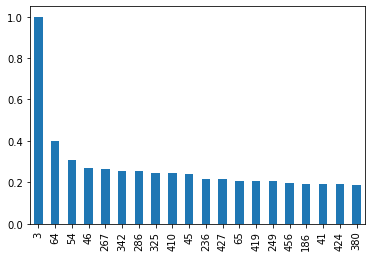

In [ ]:
pd.DataFrame(arr2).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

## Δημιουργούμε τα δύο Heatmap

In [ ]:
import seaborn as sb
from matplotlib.colors import ListedColormap

In [ ]:
#Κάνουμε dataframe τις δύο λίστες με τα cosine scores
plt_df1 = pd.DataFrame(arr1)
plt_df2 = pd.DataFrame(arr2)

In [ ]:
plt_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658
0,1.000000,0.141512,0.118884,0.214102,0.130738,0.081316,0.078566,0.253061,0.053516,0.057349,0.088600,0.138066,0.072576,0.020244,0.103294,0.021368,0.028260,0.055971,0.046213,0.138002,0.102671,0.033070,0.078680,0.224127,0.100509,0.168081,0.038976,0.068326,0.080765,0.118637,0.151416,0.167138,0.101105,0.130084,0.074998,0.110702,0.076606,0.043891,0.123697,0.247325,...,0.068001,0.063669,0.072092,0.058783,0.108529,0.039766,0.028867,0.080214,0.071496,0.154951,0.100943,0.061027,0.058318,0.078814,0.054859,0.053476,0.474219,0.081745,0.169311,0.069892,0.112306,0.081864,0.073824,0.100490,0.004949,0.086004,0.044830,0.037596,0.036894,0.106908,0.001004,0.089070,0.154995,0.056890,0.025329,0.019818,0.143392,0.117708,0.072705,0.017848
1,0.141512,1.000000,0.104347,0.199607,0.186296,0.154974,0.259046,0.063183,0.079849,0.156228,0.191452,0.201607,0.123492,0.058016,0.154452,0.062275,0.056153,0.103255,0.184092,0.149836,0.196505,0.150734,0.104337,0.094049,0.104932,0.274582,0.168935,0.130087,0.143286,0.187782,0.147822,0.205454,0.097108,0.117187,0.085878,0.184131,0.062886,0.114659,0.032455,0.184163,...,0.088862,0.044728,0.107729,0.089828,0.087891,0.068840,0.117616,0.101802,0.161991,0.082500,0.125294,0.151378,0.161623,0.210794,0.069935,0.068738,0.010429,0.179785,0.124569,0.065851,0.035053,0.133164,0.082300,0.078335,0.115860,0.068851,0.030528,0.038714,0.019137,0.130227,0.015459,0.046366,0.122449,0.066755,0.073501,0.145170,0.069543,0.147192,0.075211,0.028024
2,0.118884,0.104347,1.000000,0.088512,0.166031,0.132923,0.225150,0.065173,0.044580,0.146406,0.073260,0.139985,0.186002,0.089646,0.038772,0.032188,0.024903,0.051697,0.115640,0.155617,0.244259,0.138565,0.162338,0.098916,0.024299,0.175371,0.077347,0.038736,0.186096,0.158841,0.052736,0.078175,0.070316,0.071421,0.089543,0.189171,0.048183,0.105634,0.080321,0.198484,...,0.043453,0.032108,0.033296,0.078013,0.058613,0.035479,0.043862,0.109988,0.048821,0.196741,0.036890,0.137825,0.024103,0.034699,0.074995,0.105975,0.000632,0.083709,0.072417,0.049195,0.039241,0.127679,0.086869,0.031845,0.002371,0.063457,0.006970,0.072002,0.034645,0.067726,0.032608,0.047288,0.122923,0.060557,0.085231,0.130029,0.104509,0.173257,0.058648,0.037083
3,0.214102,0.199607,0.088512,1.000000,0.274766,0.171124,0.130302,0.149710,0.181820,0.176996,0.133574,0.117408,0.124276,0.070515,0.143912,0.003628,0.117637,0.086776,0.080644,0.207007,0.146747,0.093123,0.059288,0.165532,0.072683,0.182647,0.058806,0.178249,0.131869,0.194318,0.076003,0.135804,0.122735,0.041652,0.182219,0.158121,0.126655,0.122713,0.126881,0.096863,...,0.154506,0.051794,0.083880,0.093944,0.063230,0.040842,0.049803,0.107095,0.229612,0.120277,0.121102,0.044272,0.146289,0.045689,0.108705,0.047520,0.021219,0.039331,0.154490,0.065528,0.061382,0.097770,0.142385,0.067351,0.067281,0.179350,0.075508,0.105615,0.075573,0.109772,0.042119,0.094851,0.144730,0.067604,0.048528,0.050732,0.044593,0.191212,0.029344,0.114481
4,0.130738,0.186296,0.166031,0.274766,1.000000,0.009276,0.227746,0.171972,0.080063,0.215857,0.122070,0.168277,0.172574,0.068830,0.078971,0.082928,0.016824,0.164146,0.223299,0.189189,0.214683,0.225283,0.216255,0.148799,0.074360,0.208061,0.055790,0.104128,0.179926,0.249974,0.037678,0.158939,0.126616,0.026356,0.070813,0.143016,0.085604,0.133677,0.099161,0.082407,...,0.108694,0.046740,0.064256,0.057717,0.136742,0.076477,0.038225,0.187914,0.264082,0.130816,0.070867,0.099724,0.060926,0.127087,0.149702,0.008943,0.001531,0.123512,0.234171,0.061927,0.063512,0.119700,0.160094,0.045593,0.086558,0.229544,0.013963,0.064790,0.080127,0.040540,0.015884,0.065881,0.113179,0.092213,0.041119,0.087616,0.116964,0.123883,0.130959,0.036448


In [ ]:
plt_df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468
0,1.000000,0.343632,0.159462,0.177857,0.209617,0.071178,0.079936,0.192094,0.277867,0.152060,0.162914,0.121633,0.232379,0.317322,0.193540,0.083843,0.306140,0.346763,0.142971,0.110501,0.123981,0.072984,0.041824,0.147991,0.188114,0.170875,0.344547,0.168030,0.315829,0.136665,0.083967,0.236244,0.036759,0.136388,0.315465,0.079425,0.409024,0.038717,0.103483,0.204215,...,0.215299,0.056563,0.094261,0.142166,0.099551,0.227364,0.140370,0.168297,0.066331,0.190723,0.224934,0.133269,0.192013,0.257704,0.135129,0.180260,0.044012,0.090892,0.050177,0.122915,0.124910,0.217261,0.050925,0.150154,0.151003,0.188356,0.071802,0.203218,0.150977,0.082754,0.035987,0.049278,0.039987,0.050932,0.078397,0.114108,0.166346,0.367363,0.081827,0.159932
1,0.343632,1.000000,0.235691,0.160086,0.199856,0.047488,0.069161,0.097293,0.143625,0.259869,0.063248,0.080034,0.070908,0.085772,0.099845,0.020435,0.216464,0.183865,0.079987,0.048744,0.075785,0.027861,0.054061,0.137861,0.093152,0.105641,0.182618,0.045581,0.095326,0.020458,0.076211,0.123731,0.025875,0.063300,0.123512,0.092527,0.223860,0.028122,0.044206,0.064808,...,0.146642,0.022099,0.089230,0.088429,0.041345,0.241343,0.026220,0.110339,0.079953,0.057754,0.094137,0.055179,0.074798,0.195055,0.106137,0.106908,0.023357,0.036000,0.056498,0.079497,0.045363,0.085489,0.075105,0.039419,0.061807,0.122083,0.076286,0.120635,0.146414,0.068896,0.013239,0.108349,0.017662,0.024896,0.030622,0.083342,0.148671,0.289504,0.078406,0.138200
2,0.159462,0.235691,1.000000,0.113103,0.111532,0.063460,0.086571,0.089314,0.073637,0.475742,0.077443,0.063723,0.076325,0.017721,0.052775,0.032893,0.100428,0.021507,0.101275,0.046552,0.070032,0.013547,0.051541,0.127444,0.054756,0.070781,0.056362,0.060118,0.042848,0.060759,0.052281,0.075767,0.051743,0.088974,0.089993,0.027520,0.091163,0.004087,0.061104,0.076103,...,0.041869,0.104415,0.130079,0.035206,0.043850,0.053731,0.108312,0.094225,0.015759,0.110576,0.023694,0.048689,0.058027,0.133475,0.084171,0.109804,0.054318,0.125514,0.069233,0.071510,0.090130,0.099049,0.056794,0.093624,0.083457,0.046628,0.041755,0.048098,0.257502,0.122943,0.046815,0.130896,0.014186,0.032403,0.104610,0.013097,0.119573,0.071645,0.119737,0.065238
3,0.177857,0.160086,0.113103,1.000000,0.130229,0.158849,0.173956,0.057872,0.185929,0.184055,0.114614,0.153082,0.113687,0.088471,0.076871,0.067743,0.156736,0.112778,0.179347,0.062452,0.087584,0.108141,0.043448,0.174456,0.072647,0.111951,0.083526,0.064179,0.114471,0.014048,0.062363,0.110830,0.031693,0.090957,0.097226,0.113727,0.165400,0.154606,0.059456,0.102792,...,0.067838,0.029612,0.168172,0.049011,0.081307,0.138545,0.069161,0.096642,0.063944,0.112694,0.090212,0.082464,0.100537,0.122013,0.084965,0.141105,0.059422,0.154442,0.124885,0.159804,0.104761,0.118406,0.061145,0.177912,0.060364,0.052498,0.078356,0.194100,0.147699,0.095631,0.029598,0.157443,0.037014,0.013295,0.078642,0.048481,0.063645,0.115745,0.116872,0.084143
4,0.209617,0.199856,0.111532,0.130229,1.000000,0.119414,0.093477,0.130813,0.206048,0.166183,0.071732,0.139582,0.167747,0.116414,0.205512,0.095777,0.197905,0.109941,0.155210,0.051363,0.078416,0.191225,0.071831,0.124895,0.092526,0.113450,0.410933,0.101795,0.105541,0.033849,0.073338,0.090078,0.025109,0.153244,0.122217,0.097884,0.114943,0.215575,0.041895,0.088340,...,0.126025,0.012738,0.089892,0.058797,0.067664,0.152242,0.109589,0.136504,0.113810,0.162326,0.189258,0.073908,0.176597,0.211085,0.150651,0.109581,0.105159,0.161965,0.163146,0.161022,0.104187,0.146725,0.116158,0.147129,0.124914,0.060686,0.176479,0.122087,0.190821,0.055868,0.064260,0.145305,0.013672,0.052823,0.059271,0.062647,0.068256,0.110469,0.045999,0.074859


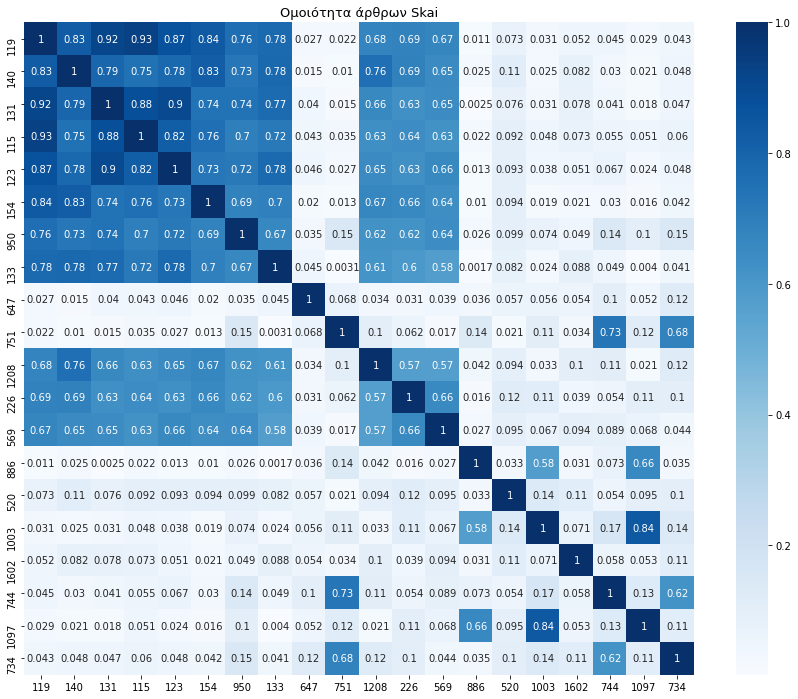

In [ ]:
# Δημιουργούμε έναν πίνακα, ορίζοντας το index κάθε γραμμής από το df του plt_df1 (άρθρα του Skai).
# Στη συνέχεια βρίσκουμε τα 20 άρθρα με την μεγαλύτερη ομοιότητα και τα αθροίζουμε.
scores1 = []
for index, row in plt_df1.iterrows():
  scores1.append({ 'i' : index, 'similarity_score': row.sort_values(ascending = False).head(20).sum()})

# Ορίζουμε ως dataframe την συνθήκη που κάναμε πριν
scores1 = pd.DataFrame(scores1)

# Παίρνουμε τα 20 άρθρα από το dataframe scores1
top20scores1 = scores1.sort_values('similarity_score', ascending=False).head(20)

# Στη συνέχεια παίρουμε τα άρθρα, το index και τις στήλες από τα 20 άρθρα με τη μεγαλύτερη ομοιότητα.
top20similar1 =  plt_df1.loc[list(top20scores1['i'])][list(top20scores1.head(20)['i'])]

# Δημιουργούμε το Heatmap
plt.figure(figsize=(15,12))
sb.heatmap(top20similar1, annot=True, cmap=plt.cm.Blues)
plt.title('Ομοιότητα άρθρων Skai', fontsize=13)
plt.show()

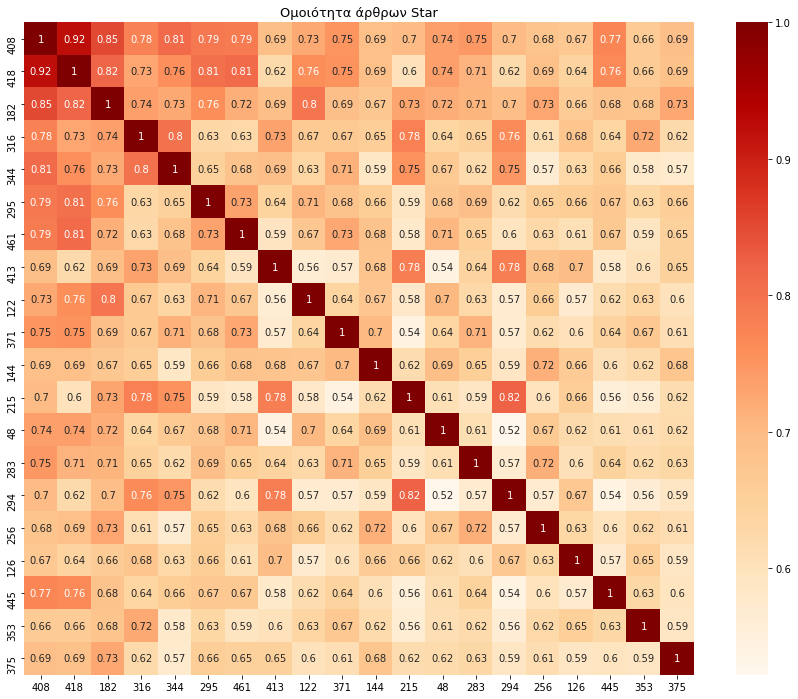

In [ ]:
# Κάνουμε την ίδια διαδικασία με πριν, αλλάζοντας το dataframe για να πάρουμε τα άρθρα του Star
scores2 = []
for index, row in plt_df2.iterrows():
  scores2.append({ 'i' : index, 'similarity_score': row.sort_values(ascending = False).head(20).sum()})

scores2 = pd.DataFrame(scores2)

top20scores2 = scores2.sort_values('similarity_score', ascending=False).head(20)

top20similar2 =  plt_df2.loc[list(top20scores2['i'])][list(top20scores2.head(20)['i'])]

plt.figure(figsize=(15,12))
sb.heatmap(top20similar2, annot=True, cmap=plt.cm.OrRd)
plt.title('Ομοιότητα άρθρων Star', fontsize=13)
plt.show()